In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### Import Libraries

In [10]:
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

### Load and Prepare Data

In [15]:
# Load the dataset from the GitHub JSON file
with open('/content/drive/MyDrive/Model/github_data.json', 'r') as f:
    github_data = json.load(f)

# Load the dataset from the OpenAI API JSON file
with open('/content/drive/MyDrive/Model/openai_api_data.json', 'r') as f:
    openai_api_data = json.load(f)

# Extract prompts and answers from both datasets
prompts = [item['Prompt'] for item in github_data]

# Assuming both JSON files have responses in the same order as prompts
github_answers = [item['Answer'] for item in github_data]
openai_api_answers = [item['Answer'] for item in openai_api_data]

# # Assuming similarity_scores is a 2D array with shape (num_prompts, num_responses)
# similarity_scores = cosine_similarity(github_answers_vectorized, openai_api_answers_vectorized)

# # Flatten similarity scores to a 1D array
# flattened_scores = similarity_scores.flatten()

# Create labels (1 for similar, 0 for not similar)
labels = [1] * len(prompts)


### Vectorize Text Data (TF-IDF Vectorization)

In [16]:
# Use TF-IDF vectorization for text data
vectorizer = TfidfVectorizer()
github_answers_vectorized = vectorizer.fit_transform(github_answers)
openai_api_answers_vectorized = vectorizer.transform(openai_api_answers)

# Assuming similarity_scores is a 2D array with shape (num_prompts, num_responses)
similarity_scores = cosine_similarity(github_answers_vectorized, openai_api_answers_vectorized)

# Flatten similarity scores to a 1D array
flattened_scores = similarity_scores.flatten()


### Reshape Data and Train-Test Split

In [22]:
# Create labels (1 for similar, 0 for not similar)
labels = [1] * (len(flattened_scores) // 2) + [0] * (len(flattened_scores) - len(flattened_scores) // 2)

# Reshape the data for compatibility with scikit-learn
X = flattened_scores.reshape(-1, 1)

# Make sure the length of labels matches the number of samples in X
y = labels[:len(flattened_scores)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Train Random Forest Model

In [23]:
# Create and train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### Evaluate the Random Forest Model

Random Forest Model Accuracy: 0.5752906890000696
Random Forest Model Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.52      0.55     50359
           1       0.57      0.63      0.60     50178

    accuracy                           0.58    100537
   macro avg       0.58      0.58      0.57    100537
weighted avg       0.58      0.58      0.57    100537



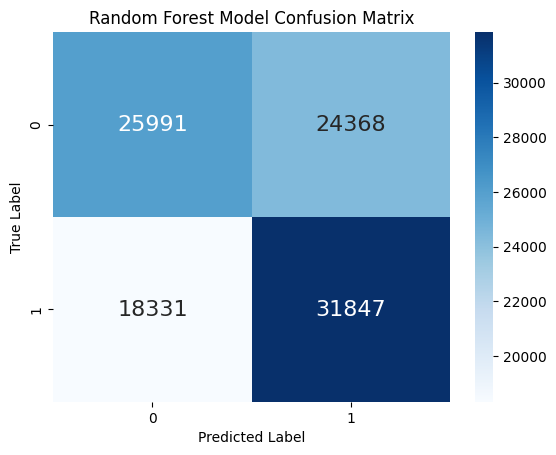

In [24]:
# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Model Accuracy: {accuracy_rf}")
print("Random Forest Model Classification Report:\n", report_rf)

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.title("Random Forest Model Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
